In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
#import datasets
features = pd.read_csv('../Inputs/CSV/features.csv')
sales = pd.read_csv('../Inputs/CSV/sales.csv')
stores = pd.read_csv('../Inputs/CSV/stores.csv')

In [270]:
#align date column
features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [271]:
#merge dataframes
total = pd.merge(sales,features, on = ['Store','Date', 'IsHoliday'], how = 'left')
total = pd.merge(total,stores, on = ['Store'], how = 'left')

In [272]:
#fill NAs with 0
#total = total.fillna(0)
total.fillna({'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0,'MarkDown4': 0, 'MarkDown5': 0}, inplace=True)

In [273]:
#encode column 'Type' as numbers
types_encoded, types = total['Type'].factorize()
total['Type'] = types_encoded

In [274]:
#change temperature to degrees celsius
total['Temperature'] = (total['Temperature'] - 32) * 5/9

In [275]:
#convert IsHoliday column from boolean to int
total['IsHoliday'] = total['IsHoliday'] * 1

In [276]:
total.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,0,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,1,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,0,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,0,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,0,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315
5,1,1,2010-12-03,21043.39,0,14.327778,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,0,151315
6,1,1,2010-03-19,22136.64,0,12.544444,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,0,151315
7,1,1,2010-03-26,26229.21,0,10.805556,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,0,151315
8,1,1,2010-02-04,57258.43,0,16.816667,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,0,151315
9,1,1,2010-09-04,42960.91,0,18.811111,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,0,151315


In [277]:
#convert Markdown columns to binary
total['MarkDown1'] = total['MarkDown1'].astype('bool')
total['MarkDown1'] = total['MarkDown1'] * 1
total['MarkDown2'] = total['MarkDown2'].astype('bool')
total['MarkDown2'] = total['MarkDown2'] * 1
total['MarkDown3'] = total['MarkDown3'].astype('bool')
total['MarkDown3'] = total['MarkDown3'] * 1
total['MarkDown4'] = total['MarkDown4'].astype('bool')
total['MarkDown4'] = total['MarkDown4'] * 1
total['MarkDown5'] = total['MarkDown5'].astype('bool')
total['MarkDown5'] = total['MarkDown5'] * 1

In [278]:
#create column 'isMarkDown' summarizing amount of MarDowns and drop other columns
total['IsMarkDown'] = total['MarkDown1'] + total['MarkDown2']+ total['MarkDown3']+ total['MarkDown4']+ total['MarkDown5']
total = total.drop(columns = ['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4', 'MarkDown5'])


In [279]:
total.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,IsMarkDown
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,15.605588,3.361027,171.201947,7.960289,0.589912,136727.915739,1.625222
std,12.785297,30.492054,22711.183519,0.255750,10.248851,0.458515,39.159276,1.863296,0.666337,60980.583328,2.214842
min,1.000000,1.000000,-4988.940000,0.000000,-18.922222,2.472000,126.064000,3.879000,0.000000,34875.000000,0.000000
25%,11.000000,18.000000,2079.650000,0.000000,8.155556,2.933000,132.022667,6.891000,0.000000,93638.000000,0.000000
50%,22.000000,37.000000,7612.030000,0.000000,16.716667,3.452000,182.318780,7.866000,0.000000,140167.000000,0.000000
75%,33.000000,74.000000,20205.852500,0.000000,23.488889,3.738000,212.416993,8.572000,1.000000,202505.000000,4.000000
max,45.000000,99.000000,693099.360000,1.000000,37.855556,4.468000,227.232807,14.313000,2.000000,219622.000000,5.000000


In [280]:
#Check average sales for all stores/departments per week
total_avg_sales_week = total.groupby(by = ['Date'], as_index = False)['Weekly_Sales'].sum()

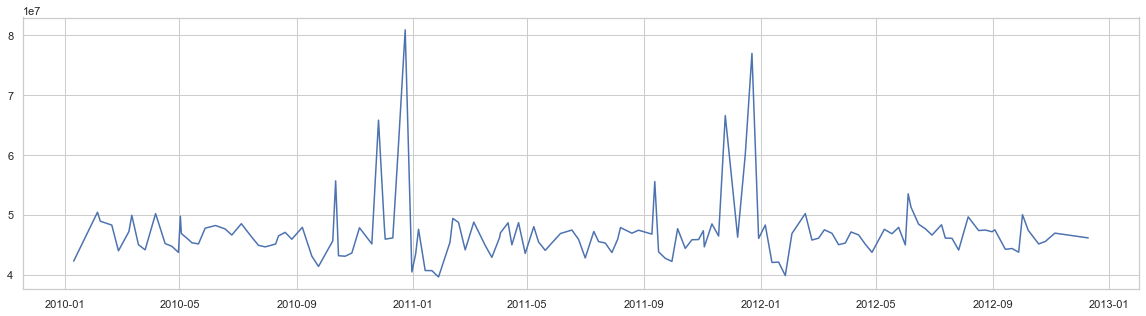

In [281]:
#Plot average sales per week to check overall trends and seasonality
plt.figure(figsize=(20,5))
plt.plot(total_avg_sales_week.Date, total_avg_sales_week.Weekly_Sales)
plt.show()

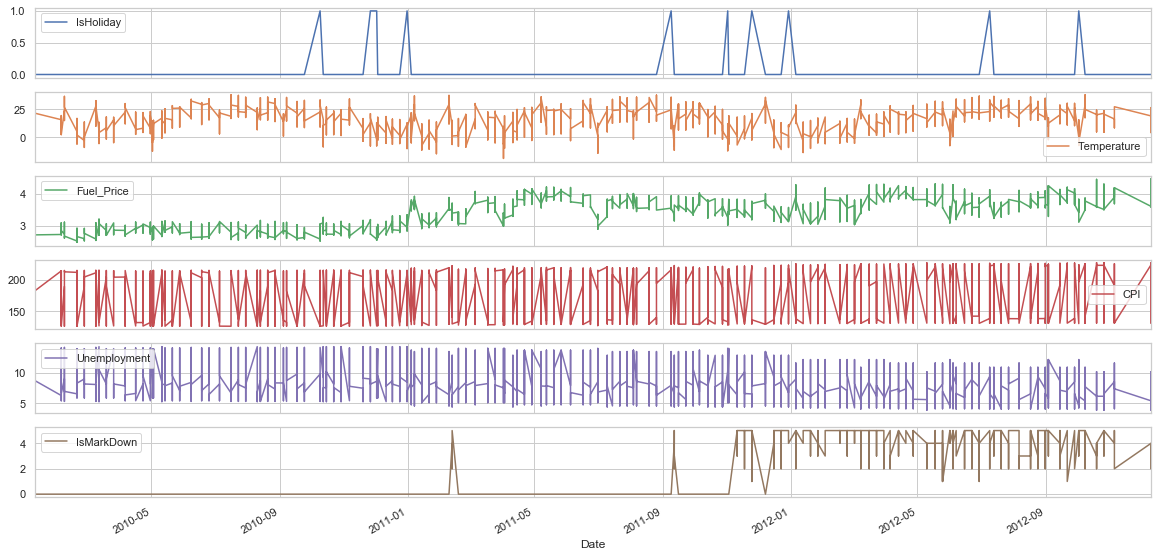

In [282]:
#Get general overview of all relevant variables over time
total[['Date','IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'IsMarkDown']].plot(x='Date', subplots=True, figsize=(20,10))
plt.show()

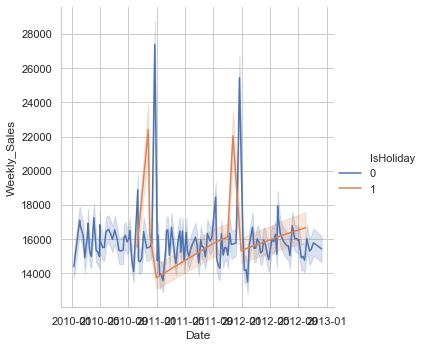

In [283]:
#Visualize holiday and non-holiday season
sns.relplot(x ='Date', y = 'Weekly_Sales', hue = 'IsHoliday', kind = 'line', data = total)